In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import random
from timeit import timeit

In [3]:
import jax.numpy as jnp
import sympy as sp

### Q1

Given matrices $A_{n \times k}$ and $B_{k \times m}$, their product matrix $C = AB$ results in a matrix $C_{n \times m}$.

Each element of matrix $C_{n \times m}$ is computed as:
$$
C_{ij} = \sum_{r=1}^{k} A_{ir} B_{rj}
$$

Each cell in $C$ requires $k$ multiplications and $(k-1)$ additions.
There are total $n \times m$ cells in $C$.

$$
Additions = n \times m \times (k-1)
\\
Multiplications = n \times m \times k
$$

### Q2

In [4]:
n, k, m = 5,9,8
A = [[random.random() for _ in range(k)] for _ in range(n)]
B = [[random.random() for _ in range(m)] for _ in range(k)]

In [5]:
def matrix_multiply_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for r in range(k):
                C[i][j] += A[i][r] * B[r][j]
                
    return C;

In [6]:
def matrix_multiply_np(A, B):
    A_np = np.array(A)
    B_np = np.array(B)
    
    C_np = C_np = np.dot(A_np, B_np)
    
    return C_np;

In [7]:
time1 = timeit('matrix_multiply_list(A, B)', globals=globals(), number=1000)
time2 = timeit('matrix_multiply_np(A, B)', globals=globals(), number=1000)

print(f"Multiplication using list of list took {time1:.6f} seconds")
print(f"Multiplication using numpy took {time2:.6f} seconds")

Multiplication using list of list took 0.026359 seconds
Multiplication using numpy took 0.005967 seconds


As is clearly seen the approach Matrix Multiplication is fatser using $Numpy$ than using $List \space of  \space List$ approach

### Q3

In the given approach to find the minimum element in the array we need to iterate once over the entire list which is of complexity $O(n)$
If we have to find median which is approximately finding the $(n/2)^{\text{th}}$ smallest element which will have complexity
$$
O(n) + O(n) \space ... \space n/2 \space times
\\
= O(n \times n/2)
$$
Hence the complexity is of the order of $O(n^2)$

In [8]:
def naive_median(arr):
    n = len(arr)
    half_len = n // 2
    for i in range(half_len):
        max_index = arr.index(max(arr))
        arr.pop(max_index)
    return max(arr)

arr = np.random.randint(0, 1000, size=1000).tolist()
print(f"Naive Median: {naive_median(arr[:])}")

Naive Median: 490


A better method would include sorting the whole list which will take $O(n \space logn)$ time
Then we could find the median i.e the $(n/2)^{\text{th}}$ smallest element at index $n/2$
Overall Complexity of the approach:
$$
O(n \space logn) + O(1)
= O(n \space logn)
$$

One such sorting algorithm that sorts the array in $O(n \space logn)$ time is $QuickSort$

In [9]:
import numpy as np

def partition(arr, low, high):
    x = low
    
    for j in range(low + 1, high + 1):
        if arr[j] < arr[low]:
            x += 1
            
    arr[low], arr[x] = arr[x], arr[low]

    i = low
    j = high
    
    while i < x and j > x:
        if arr[i] < arr[x]:
            i += 1
        elif arr[j] > arr[x]:
            j -= 1
        else:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
            j -= 1

    return x

def quickSort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quickSort(arr, low, pivot_index - 1)
        quickSort(arr, pivot_index + 1, high)

def quick_median(arr):
    n = len(arr)
    quickSort(arr, 0, n - 1)
    if n % 2 == 1:
        return arr[n // 2]
    else:
        return 0.5 * (arr[n // 2 - 1] + arr[n // 2])


arr = np.random.randint(0, 1000, size=1000).tolist()
print(f"Quickselect Median: {quick_median(arr[:])}")

Quickselect Median: 482.5


In [10]:
arr = np.random.randint(0, 1000, size=1000).tolist()

# Naive method
naive_time = timeit(lambda: naive_median(arr), number=10)
print(f"Naive method time: {naive_time:.6f} seconds")

# Quickselect method
quickselect_time = timeit(lambda: quick_median(arr), number=10)
print(f"Quickselect method time: {quickselect_time:.6f} seconds")

# NumPy method
numpy_time = timeit(lambda: np.median(arr), number=10)
print(f"NumPy method time: {numpy_time:.6f} seconds")

Naive method time: 0.004209 seconds
Quickselect method time: 0.000008 seconds
NumPy method time: 0.000257 seconds


It is obseverved that the naive approach takes more time then when median is found using numpy
<br>
However finding the median takes less time using the method to sort the array first then using numpy

### Q4

The gradient of the function f:
$$
x^2 y + y^3 sin(x)
$$
is $\nabla f$ given by:
$$
(2xy + y^3 cos(x),\space x^2 + 3y^2 sin(x))
$$

### Q5

In [11]:
from jax import grad, random, vmap

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)
df_dx_vmap = vmap(df_dx, in_axes=(0, 0))
df_dy_vmap = vmap(df_dy, in_axes=(0, 0))

key = random.PRNGKey(0)
x_vals = random.uniform(key, shape=(5,), minval=-10.0, maxval=10.0)
y_vals = random.uniform(key, shape=(5,), minval=-10.0, maxval=10.0)
grad_x_vals = df_dx_vmap(x_vals, y_vals)
grad_y_vals = df_dy_vmap(x_vals, y_vals)

print("Random x values:", x_vals)
print("Random y values:", y_vals)
print("JAX computed gradient with respect to x for array:", grad_x_vals)
print("JAX computed gradient with respect to y for array:", grad_y_vals)

Random x values: [ 1.4900088 -8.006279  -2.1367955  7.8835654  1.9313312]
Random y values: [ 1.4900088 -8.006279  -2.1367955  7.8835654  1.9313312]
JAX computed gradient with respect to x for array: [  4.7072077 206.0592     14.363743  109.8082      4.918711 ]
JAX computed gradient with respect to y for array: [   8.858783 -125.97515    -6.99568   248.52083    14.200729]


### Q6

In [12]:
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
grad_f = [sp.diff(f, var) for var in (x, y)]

print("Symbolic Gradient:")
print(grad_f)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * np.cos(x)
    df_dy = x**2 + 3 * y**2 * np.sin(x)
    return np.array([df_dx, df_dy])

test_points = [(np.random.rand(), np.random.rand()) for _ in range(5)]

for point in test_points:
    x_val, y_val = point
    grad_analytical = analytical_gradient(x_val, y_val)
    grad_symbolic = [float(g.evalf(subs={x: x_val, y: y_val})) for g in grad_f]
    
    print(f"\nPoint (x, y): ({x_val:.4f}, {y_val:.4f})")
    print(f"Symbolic Gradient:   {grad_symbolic}")
    print(f"Analytical Gradient: {grad_analytical}")
    print(f"Difference:          {np.array(grad_symbolic) - grad_analytical}")

Symbolic Gradient:
[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]

Point (x, y): (0.7116, 0.3291)
Symbolic Gradient:   [0.49541782237006304, 0.7185532392280589]
Analytical Gradient: [0.49541782 0.71855324]
Difference:          [0. 0.]

Point (x, y): (0.5728, 0.7959)
Symbolic Gradient:   [1.3353718314172816, 1.3579582810605704]
Analytical Gradient: [1.33537183 1.35795828]
Difference:          [0. 0.]

Point (x, y): (0.5906, 0.9667)
Symbolic Gradient:   [1.8921318229609443, 1.9099893963591401]
Analytical Gradient: [1.89213182 1.9099894 ]
Difference:          [0. 0.]

Point (x, y): (0.8534, 0.5590)
Symbolic Gradient:   [1.0688424904718772, 1.4345802290775442]
Analytical Gradient: [1.06884249 1.43458023]
Difference:          [ 0.00000000e+00 -2.22044605e-16]

Point (x, y): (0.8256, 0.6976)
Symbolic Gradient:   [1.3821281678542812, 1.7546410295661221]
Analytical Gradient: [1.38212817 1.75464103]
Difference:          [0. 0.]


Since the analytical gradient is almost the same as the actually computed gradient i.e (symbolic - analytical) is tending to 0.
<br>
Hence our analytical gradient thus computed is verified.

### Q7

In [13]:
student_records = {
    2022: {
        "Branch 1": {
            3: {
                "Name": "Spider",
                "Marks": {
                    "Maths": 93,
                    "English": 77,
                    "Science": 96
                }
            },
            7: {
                "Name": "Ant",
                "Marks": {
                    "Maths": 90,
                    "English": 80,
                    "Science": 88
                }
            }
        },
        "Branch 2": {
            4: {
                "Name": "Croc",
                "Marks": {
                    "Maths": 95,
                    "English": 75,
                    "Science": 82
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            3: {
                "Name": "Beetle",
                "Marks": {
                    "Maths": 85,
                    "English": 78,
                    "Science": 91
                }
            }
        },
        "Branch 2": {
            5: {
                "Name": "Rat",
                "Marks": {
                    "Maths": 88,
                    "English": 82,
                    "Science": 90
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            9: {
                "Name": "Snake",
                "Marks": {
                    "Maths": 92,
                    "English": 80,
                    "Science": 89
                }
            }
        },
        "Branch 2": {
            4: {
                "Name": "Eagle",
                "Marks": {
                    "Maths": 87,
                    "English": 77,
                    "Science": 84
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            12: {
                "Name": "Vulture",
                "Marks": {
                    "Maths": 91,
                    "English": 83,
                    "Science": 87
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "Crow",
                "Marks": {
                    "Maths": 90,
                    "English": 79,
                    "Science": 85
                }
            }
        }
    }
}

### Q8

In [14]:
class Marks:
    def __init__(self, maths, english, science):
        self.maths = maths
        self.english = english
        self.science = science

    def __repr__(self):
        return f"{{Maths: {self.maths}, English: {self.english}, Science: {self.science}}}"

class Student:
    def __init__(self, name, marks):
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"{{Name: {self.name}, Marks: {self.marks}}}"

class Branch:
    def __init__(self):
        self.students = {}

    def add_student(self, roll_number, name, marks):
        self.students[roll_number] = Student(name, marks)

    def __repr__(self):
        return f"{self.students}"

class Year:
    def __init__(self):
        self.branches = {}

    def add_branch(self, branch_name, branch):
        self.branches[branch_name] = branch

    def __repr__(self):
        return f"{self.branches}"

class StudentRecords:
    def __init__(self):
        self.years = {}

    def add_year(self, year, year_data):
        self.years[year] = year_data

    def __repr__(self):
        return f"student_records = {self.years}"

In [15]:
records = StudentRecords()

# Data for 2022
year_2022 = Year()
branch_1_2022 = Branch()
branch_1_2022.add_student(1, "Spider", Marks(93, 77, 96))
branch_1_2022.add_student(2, "Ant", Marks(90, 80, 88))
branch_2_2022 = Branch()
branch_2_2022.add_student(1, "Croc", Marks(95, 75, 82))
year_2022.add_branch("Branch 1", branch_1_2022)
year_2022.add_branch("Branch 2", branch_2_2022)
records.add_year(2022, year_2022)

# Data for 2023
year_2023 = Year()
branch_1_2023 = Branch()
branch_1_2023.add_student(1, "Beetle", Marks(85, 78, 91))
branch_2_2023 = Branch()
branch_2_2023.add_student(1, "Rat", Marks(88, 82, 90))
year_2023.add_branch("Branch 1", branch_1_2023)
year_2023.add_branch("Branch 2", branch_2_2023)
records.add_year(2023, year_2023)

# Data for 2024
year_2024 = Year()
branch_1_2024 = Branch()
branch_1_2024.add_student(1, "Snake", Marks(92, 80, 89))
branch_2_2024 = Branch()
branch_2_2024.add_student(1, "Eagle", Marks(87, 77, 84))
year_2024.add_branch("Branch 1", branch_1_2024)
year_2024.add_branch("Branch 2", branch_2_2024)
records.add_year(2024, year_2024)

# Data for 2025
year_2025 = Year()
branch_1_2025 = Branch()
branch_1_2025.add_student(1, "Vulture", Marks(91, 83, 87))
branch_2_2025 = Branch()
branch_2_2025.add_student(1, "Crow", Marks(90, 79, 85))
year_2025.add_branch("Branch 1", branch_1_2025)
year_2025.add_branch("Branch 2", branch_2_2025)
records.add_year(2025, year_2025)

print(records)

student_records = {2022: {'Branch 1': {1: {Name: Spider, Marks: {Maths: 93, English: 77, Science: 96}}, 2: {Name: Ant, Marks: {Maths: 90, English: 80, Science: 88}}}, 'Branch 2': {1: {Name: Croc, Marks: {Maths: 95, English: 75, Science: 82}}}}, 2023: {'Branch 1': {1: {Name: Beetle, Marks: {Maths: 85, English: 78, Science: 91}}}, 'Branch 2': {1: {Name: Rat, Marks: {Maths: 88, English: 82, Science: 90}}}}, 2024: {'Branch 1': {1: {Name: Snake, Marks: {Maths: 92, English: 80, Science: 89}}}, 'Branch 2': {1: {Name: Eagle, Marks: {Maths: 87, English: 77, Science: 84}}}}, 2025: {'Branch 1': {1: {Name: Vulture, Marks: {Maths: 91, English: 83, Science: 87}}}, 'Branch 2': {1: {Name: Crow, Marks: {Maths: 90, English: 79, Science: 85}}}}}


### Q9

$$
y = x
$$

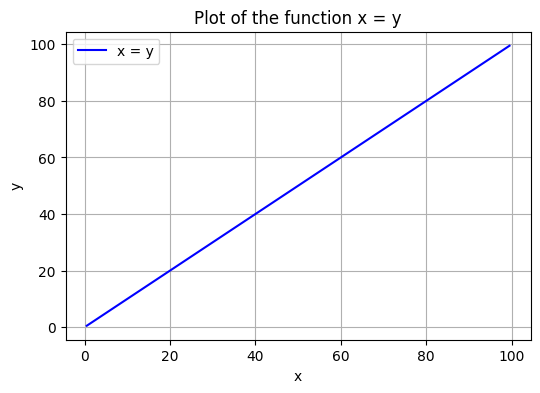

In [16]:
x = np.arange(0.5, 100.0, 0.5)
y = x

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

$$
y = x ^ 2
$$

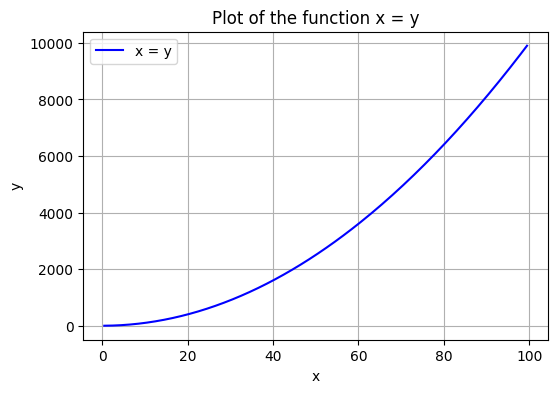

In [17]:
x = np.arange(0.5, 100.0, 0.5)
y = np.power(x,2)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

$$
y = \frac{x^3}{100}
$$

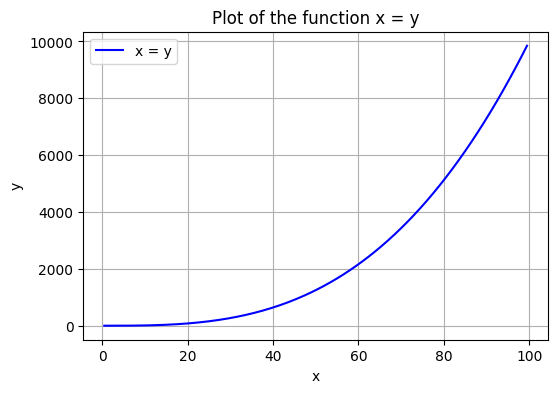

In [18]:
x = np.arange(0.5, 100.0, 0.5)
y = np.power(x,3) / 100

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

$$
y = sin(x)
$$

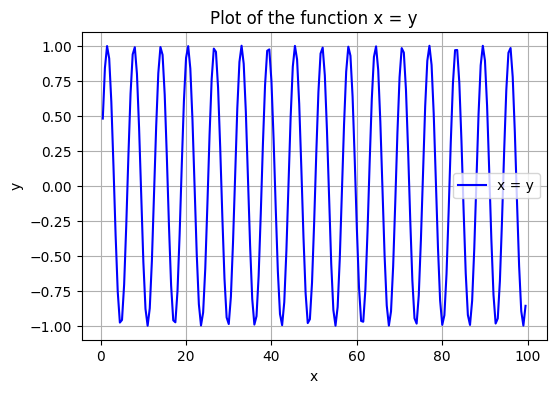

In [19]:
x = np.arange(0.5, 100.0, 0.5)
y = np.sin(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

$$
y = \frac{\sin(x)}{x}
$$

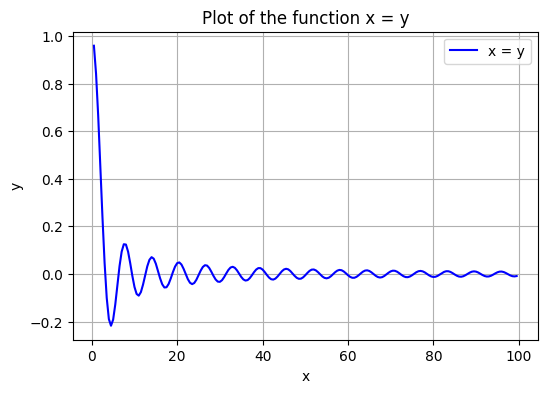

In [20]:
x = np.arange(0.5, 100.0, 0.5)
y = np.sin(x) / x

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

$$
y = log x
$$

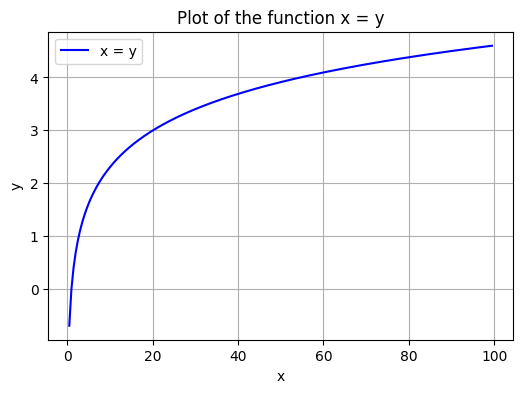

In [21]:
x = np.arange(0.5, 100.0, 0.5)
y = np.log(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

$$
y = e ^ x
$$

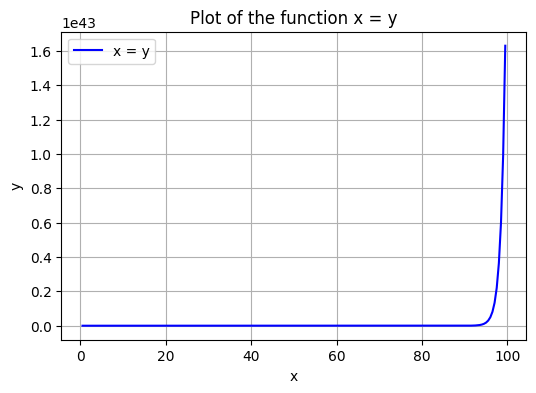

In [22]:
x = np.arange(0.5, 100.0, 0.5)
y = np.exp(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='x = y', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the function x = y')
plt.grid(True)
plt.legend()
plt.show()

### Q10

In [23]:
matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

In [24]:
std_devs = df.std()
max_std_column = std_devs.idxmax()
print("Column with the highest standard deviation:")
print(max_std_column)

Column with the highest standard deviation:
c


In [25]:
means = df.mean(axis=1)
min_mean_row_index = means.idxmin()
print("Row with the lowest mean:")
print(df.iloc[min_mean_row_index])

Row with the lowest mean:
a    1.284012
b    1.621072
c    1.049242
d    1.100916
e    1.156082
Name: 5, dtype: float64


### Q11

In [26]:
matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

In [27]:
num_lt8 = df[df['g'] == 'LT8'].shape[0]
print(f"Number of rows where the value in column 'g' is 'LT8': {num_lt8}")

Number of rows where the value in column 'g' is 'LT8': 16


In [28]:
std_dev_lt8 = df[df['g'] == 'LT8']['f'].std()
print(f"Standard deviation of column 'f' for rows where the value in column 'g' is 'LT8': {std_dev_lt8}")

std_dev_gt8 = df[df['g'] == 'GT8']['f'].std()
print(f"Standard deviation of column 'f' for rows where the value in column 'g' is 'GT8': {std_dev_gt8}")

Standard deviation of column 'f' for rows where the value in column 'g' is 'LT8': 0.44016739902665414
Standard deviation of column 'f' for rows where the value in column 'g' is 'GT8': 0.10841361110057288


### Q12

Broadcasting helps to perform operations on arrays of different shape.
<br>
Numpy automatically adjusts the shape of the two arrays to perform the operation

In [29]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])


vector = np.array([10, 20, 30])

result = matrix + vector

print("Matrix:")
print(matrix)

print("\nVector:")
print(vector)

print("\nResult of matrix + vector (broadcasting):")
print(result)

Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector:
[10 20 30]

Result of matrix + vector (broadcasting):
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In above code the size of the vector is changed from $1 \times 3$ to $3 \times 3$ to make it compatible with the matrix to perform addition.

### Q13

In [30]:
def custom_argmin(arr):    
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
            
    return min_index

In [31]:
# Testing the function
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])

result_custom = custom_argmin(array)
print(f"Custom argmin result: {result_custom}")

result_numpy = np.argmin(array)
print(f"NumPy argmin result: {result_numpy}")

Custom argmin result: 1
NumPy argmin result: 1


Hence the answer is the same